In [1]:
#|default_exp app

Art2Artist Recognizer

In [2]:
!pip install -Uqq fastai gradio nbdev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.4/325.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.9 MB/s eta 0:00:00


In [3]:
from fastai.vision.all import *

In [4]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Data Science/Art Recognizer

/content/drive/MyDrive/Data Science/Art Recognizer


In [7]:
#!export
model = load_learner(f'models/art-recognizer-v2.pkl')

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [8]:
#|export
artist_labels = ("Caravaggio's artwork",
                 "Claude Monet's artwork",
"Diego Rivera's artwork",
"Edgar Degas's artwork",
"Edvard Munch's artwork",
"Frida Kahlo's artwork",
"Gustav Klimt's artwork",
"Henri Matisse's artwork",
"Jackson Pollock's artwork",
"Joan Miró's artwork",
"Leonardo da Vinci's artwork",
"Mark Rothko's artwork",
"Michelangelo's artwork",
"Pablo Picasso's artwork",
"Paul Cézanne's artwork",
"Pierre-Auguste's artwork",
"Raphael's artwork",
"Rembrandt van Rijn's artwork",
"Salvador Dalí's artwork",
"Vincent van Gogh's artwork")


def recognize_img(image):
  pred, idx, probs = model.predict(image)

  return dict(zip(artist_labels, map(float, probs)))

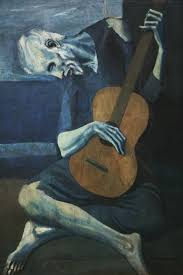

In [9]:
img = PILImage.create(f'test_images/download (3).jpeg')
img.to_thumb(128,128)
img

In [10]:
recognize_img(img)

{"Caravaggio's artwork": 0.00012560308095999062,
 "Claude Monet's artwork": 0.0001826203806558624,
 "Diego Rivera's artwork": 0.004118229262530804,
 "Edgar Degas's artwork": 0.006506515201181173,
 "Edvard Munch's artwork": 0.011003728024661541,
 "Frida Kahlo's artwork": 0.0006286988500505686,
 "Gustav Klimt's artwork": 0.001133072073571384,
 "Henri Matisse's artwork": 0.03597515448927879,
 "Jackson Pollock's artwork": 0.0010399032616987824,
 "Joan Miró's artwork": 0.016053032130002975,
 "Leonardo da Vinci's artwork": 0.00018127718067262322,
 "Mark Rothko's artwork": 0.0006871616933494806,
 "Michelangelo's artwork": 0.0005658931913785636,
 "Pablo Picasso's artwork": 0.8938621878623962,
 "Paul Cézanne's artwork": 0.0013683447614312172,
 "Pierre-Auguste's artwork": 0.00012122416956117377,
 "Raphael's artwork": 0.00011276813893346116,
 "Rembrandt van Rijn's artwork": 0.0005624073673970997,
 "Salvador Dalí's artwork": 0.012448767200112343,
 "Vincent van Gogh's artwork": 0.013323531486093

In [ ]:
#!export
# Gradio app interface
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🎨 Art2Artist Recognizer")
    
    with gr.Row():
        with gr.Column():
            image = gr.Image(type="filepath", label="Upload Artwork")
            btn = gr.Button("Identify Artist")
        with gr.Column():
            label = gr.Label(label="Prediction")
    
    gr.Examples(
        examples=['test_images/download (1).jpeg', 'test_images/download (2).jpeg',
                 'test_images/download (3).jpeg', 'test_images/download (4).jpeg'],
        inputs=image
    )
    
    btn.click(fn=recognize_img, inputs=image, outputs=label)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://244cd9c02290915756.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Notebook to Python Script Export

In [36]:
from nbdev.export import nb_export

In [37]:
nb_export('app.ipynb')

FileNotFoundError: [Errno 2] No such file or directory: 'app.ipynb'